## Carga de librerias

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

## Carga del dataset

In [2]:
dataset = pd.read_csv('https://docs.google.com/uc?id=10BhrkpLE_cNNfDJ9R59hqYK-KTQZpItM&export=download')
# Imprimiento las dimensiones del dataset (filas, columnas)=(registros, variables)
print(dataset.values.shape)
# Imprimir el primer registro del dataset
dataset.head(1)

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189


Obtener la informacion del dataset, en la tabla mostrada se muestran los datos encontrados en las filas del dataset, mostrandose los resultados no nulos asi como el tipo de dato inferido a partir del procesamiento del conjunto de datos.

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Se eliminan los valores duplicados del dataset para trabajar con registros
unicos, esta operacion se realiza sobre el mismo conjunto por lo que el
dataset original se vera afectado si se encuentran valores duplicados.

In [4]:
dataset.drop_duplicates(inplace = True)

Se divide el dataset en las variables independientes (X) y la variable dependiente (Y)

In [5]:
X = dataset.values[:,1:31]
Y = dataset.values[:,0]
# Se imprimen las dimensiones de ambos conjuntos para confirmar que la segmentacion
# se ha hecho adecuadamente.
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Se grafica el valor medio del radio celular de las celulas benignas contra las
celulas malignas. De el grafico obtenido se puede observar que en promedio el 
radio celular de las celulas malignas es mucho mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs radius_mean')

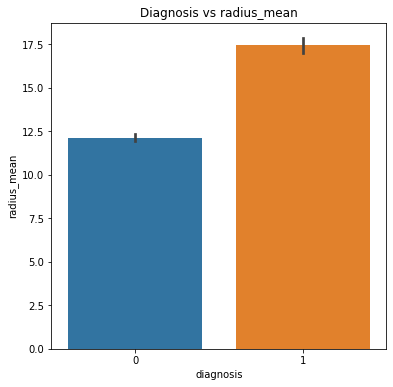

In [6]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'radius_mean', data = dataset)

plt.title('Diagnosis vs radius_mean')

Se grafica el valor medio de la textura celular de las celulas benignas contra las celulas malignas. De el grafico obtenido se puede observar que en promedio de la textura celular de las celulas malignas es mucho mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs texture_mean')

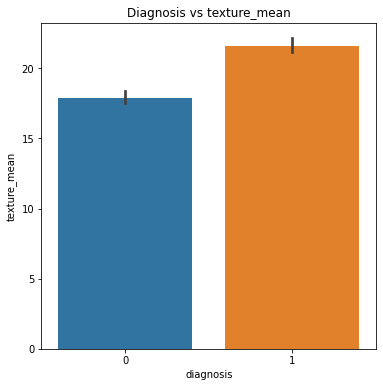

In [7]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'texture_mean', data = dataset)

plt.title('Diagnosis vs texture_mean')

Se grafica el valor medio del perimetro celular de las celulas benignas contra las celulas malignas. De el grafico obtenido se puede observar que en promedio el perimetro celular de las celulas malignas es mucho mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs perimeter_mean')

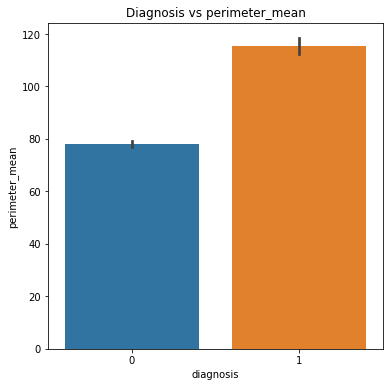

In [8]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'perimeter_mean', data = dataset)

plt.title('Diagnosis vs perimeter_mean')

Se grafica el valor medio del área celular de las celulas benignas contra las celulas malignas. De el grafico obtenido se puede observar que en promedio el área celular de las celulas malignas es mucho mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs area_mean')

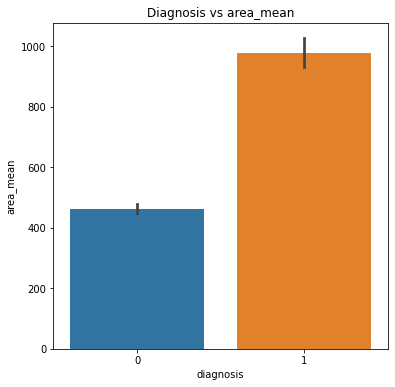

In [9]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'area_mean', data = dataset)

plt.title('Diagnosis vs area_mean')

Se grafica el valor medio de la suavidad celular de las celulas benignas contra las celulas malignas. De el grafico obtenido se puede observar que en promedio la suavidad celular de las celulas malignas es mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs smoothness_mean')

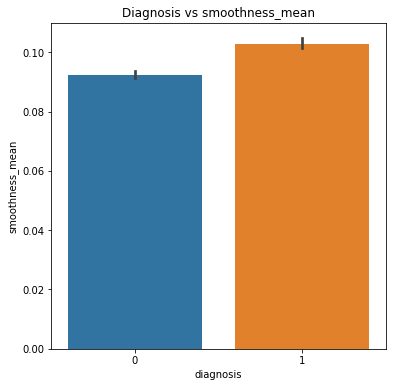

In [10]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'smoothness_mean', data = dataset)

plt.title('Diagnosis vs smoothness_mean')

Se grafica el valor medio de la compactación celular de las celulas benignas contra las celulas malignas. De el grafico obtenido se puede observar que en promedio la compactación celular de las celulas malignas es mucho mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs compactness_mean')

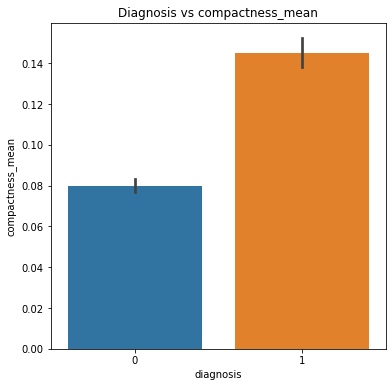

In [11]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'compactness_mean', data = dataset)

plt.title('Diagnosis vs compactness_mean')


Se grafica el valor medio de la concavidad celular de las celulas benignas contra las celulas malignas. De el grafico obtenido se puede observar que en promedio la concavidad celular de las celulas malignas es mucho mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs concavity_mean')

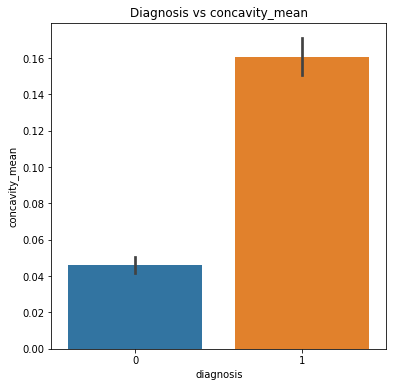

In [12]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'concavity_mean', data = dataset)

plt.title('Diagnosis vs concavity_mean')

Se grafica el valor medio de los puntos de concavidad celular de las celulas benignas contra las celulas malignas. De el grafico obtenido se puede observar que en promedio los puntos de concavidad celular de las celulas malignas es mucho mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs concave points_mean')

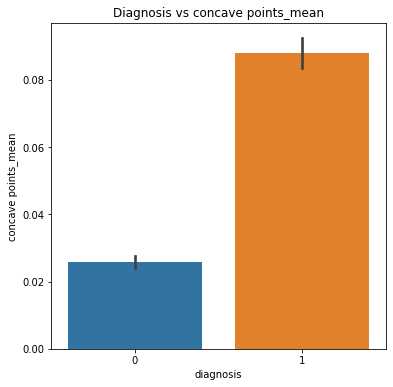

In [13]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'concave points_mean', data = dataset)

plt.title('Diagnosis vs concave points_mean')

Se grafica el valor medio de la simetría celular de las celulas benignas contra las celulas malignas. De el grafico obtenido se puede observar que en promedio la simetría celular de las celulas malignas es mucho mayor que el de las celulas benignas.

Text(0.5, 1.0, 'Diagnosis vs symmetry_mean')

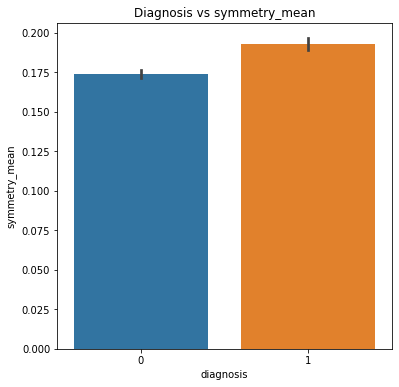

In [14]:
fig = plt.figure(figsize = (6,6))
sns.barplot(x = 'diagnosis', y = 'symmetry_mean', data = dataset)

plt.title('Diagnosis vs symmetry_mean')

Se grafican los valores de todos los registros correspondientes a la poblacion de casos diagnosticados como verdaderos contra los registros de casos diagnosticados como falsos. En la grafica se puede observar que las celulas malignas presentan una distribucion bastante caracteristica con respecto a los valores presentados en las celulas benignas, lo cual indica que las poblaciones podran ser caracterizadas por el algoritmo de aprendizade de una manera adecuada.

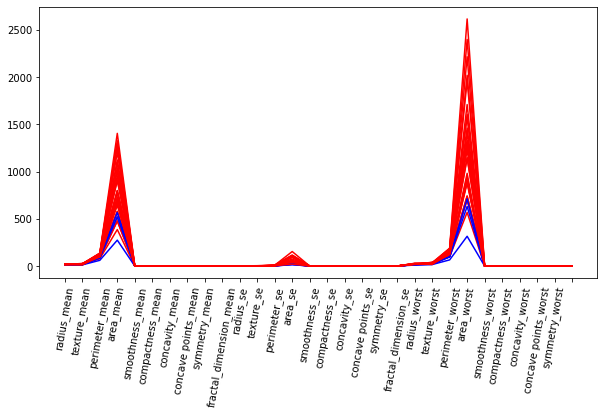

In [15]:
columns = dataset.columns
width=30
t = np.arange(0, width, 1)
plt.figure(figsize = (10,5))
for i in range(width):
  if Y[i] == 1:
    plt.plot(t, X[i][0:width], 'r')
  elif Y[i] == 0:
    plt.plot(t, X[i][0:width], 'b')
plt.xticks(t, columns[1:width], rotation=80)
plt.show()

Se grafican los maximos de ambas poblaciones (casos benignos y casos malignos) y se observa que existen al menos 3 variables independientes que presentan notables variaciones entre ambos sub conjuntos: area_mean, area_se y area_worst. Como se puede observar los tres parametros corresponden a variables relacionadas con el area de las celulas.

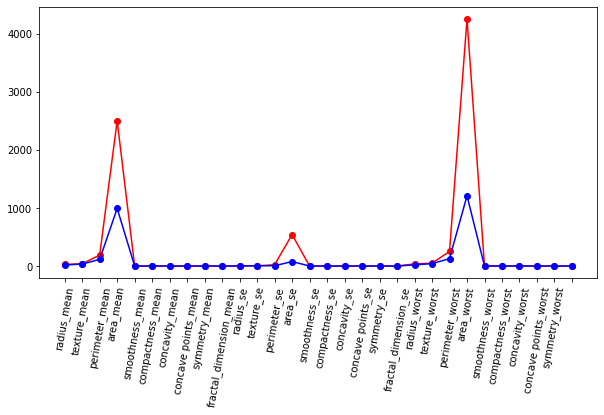

In [16]:
maxP=[-10000]*30
maxN=[-10000]*30
minP=[10000]*30
minN=[10000]*30
for i in range(Y.shape[0]):
  if Y[i] == 1:
    for j in range(X[i].shape[0]):
      if maxP[j] < X[i][j]:
        maxP[j] = X[i][j]
      if minP[j] > X[i][j]:
        minP[j] = X[i][j]
  else:
    for j in range(X[i].shape[0]):
      if maxN[j] < X[i][j]:
        maxN[j] = X[i][j]
      if minN[j] > X[i][j]:
        minN[j] = X[i][j]

width=30
t = np.arange(0, width, 1)
plt.figure(figsize = (10,5))
plt.plot(t, maxP[0:width], 'ro-')
plt.plot(t, maxN[0:width], 'bo-')
# plt.plot(t, minP[0:width], 'yo-')
# plt.plot(t, minN[0:width], 'go-')
plt.xticks(t, columns[1:width]+[""], rotation=80)
plt.show()

## Creación de conjunto de datos

Se divide el conjunto de datos en tres subconjuntos: un conjunto de entranamiento y dos conjuntos de prueba.

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 4)
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test, Y_test, test_size=0.1, random_state = 4)
print(X_train.shape)
print(Y_train.shape)
print(X_test1.shape)
print(Y_test1.shape)
print(X_test2.shape)
print(Y_test2.shape)

(455, 30)
(455,)
(102, 30)
(102,)
(12, 30)
(12,)


## Creación del modelo

Se crea un nuevo modelo y se le añaden 3 capas de neuronas, indicando para cada capa la dimension de la misma y la función de activación.

In [18]:
model = Sequential()
model.add(Dense(35, input_dim=30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Se compila el modelo creado para que la arquitectura interna de la red neuronal sea creada, proporcionando los parametros de: metodo de optimización (Adam) y funcion de costo (Binary Crossentropy)

In [19]:
model.compile(
  optimizer='adam',
  loss='binary_crossentropy',
  metrics=['accuracy']
)

### Entrenamiento del modelo

In [20]:
hist = model.fit(X_train, Y_train, validation_data = (X_test1, Y_test1), batch_size=100, epochs=1000, validation_split=0.2, verbose=1)

Epoch 1/1000
4/4 [==============================] - 0s 31ms/step - loss: 43.9860 - accuracy: 0.6209 - val_loss: 25.5051 - val_accuracy: 0.5604
Epoch 2/1000
4/4 [==============================] - 0s 4ms/step - loss: 11.7709 - accuracy: 0.4670 - val_loss: 8.8086 - val_accuracy: 0.4396
Epoch 3/1000
4/4 [==============================] - 0s 4ms/step - loss: 11.9107 - accuracy: 0.3791 - val_loss: 11.1635 - val_accuracy: 0.4396
Epoch 4/1000
4/4 [==============================] - 0s 4ms/step - loss: 10.6799 - accuracy: 0.3791 - val_loss: 4.1115 - val_accuracy: 0.4396
Epoch 5/1000
4/4 [==============================] - 0s 5ms/step - loss: 3.2319 - accuracy: 0.4808 - val_loss: 7.2581 - val_accuracy: 0.5604
Epoch 6/1000
4/4 [==============================] - 0s 4ms/step - loss: 4.9141 - accuracy: 0.6236 - val_loss: 0.9996 - val_accuracy: 0.5714
Epoch 7/1000
4/4 [==============================] - 0s 4ms/step - loss: 1.6492 - accuracy: 0.4753 - val_loss: 2.3444 - val_accuracy: 0.4396
Epoch 8/1000


4/4 [==============================] - 0s 4ms/step - loss: 0.1705 - accuracy: 0.9341 - val_loss: 0.0838 - val_accuracy: 0.9780
Epoch 60/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9313 - val_loss: 0.0815 - val_accuracy: 0.9890
Epoch 61/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1697 - accuracy: 0.9231 - val_loss: 0.0853 - val_accuracy: 0.9670
Epoch 62/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1699 - accuracy: 0.9368 - val_loss: 0.0819 - val_accuracy: 0.9780
Epoch 63/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1713 - accuracy: 0.9231 - val_loss: 0.0806 - val_accuracy: 0.9890
Epoch 64/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1720 - accuracy: 0.9176 - val_loss: 0.0879 - val_accuracy: 0.9560
Epoch 65/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1832 - accuracy: 0.9341 - val_loss: 0.0861 - val_accuracy: 0.9560
Epoch 66/1000
4/4 [========

4/4 [==============================] - 0s 4ms/step - loss: 0.1655 - accuracy: 0.9423 - val_loss: 0.0746 - val_accuracy: 0.9780
Epoch 118/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1649 - accuracy: 0.9286 - val_loss: 0.0729 - val_accuracy: 0.9890
Epoch 119/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.9341 - val_loss: 0.0728 - val_accuracy: 0.9890
Epoch 120/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1588 - accuracy: 0.9231 - val_loss: 0.0725 - val_accuracy: 0.9890
Epoch 121/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1614 - accuracy: 0.9286 - val_loss: 0.0739 - val_accuracy: 0.9780
Epoch 122/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1572 - accuracy: 0.9341 - val_loss: 0.0725 - val_accuracy: 0.9890
Epoch 123/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1555 - accuracy: 0.9423 - val_loss: 0.0734 - val_accuracy: 0.9890
Epoch 124/1000
4/4 [=

Epoch 175/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1703 - accuracy: 0.9396 - val_loss: 0.0676 - val_accuracy: 0.9890
Epoch 176/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1550 - accuracy: 0.9341 - val_loss: 0.0735 - val_accuracy: 0.9560
Epoch 177/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1522 - accuracy: 0.9423 - val_loss: 0.0705 - val_accuracy: 0.9890
Epoch 178/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1656 - accuracy: 0.9258 - val_loss: 0.0717 - val_accuracy: 0.9780
Epoch 179/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1638 - accuracy: 0.9258 - val_loss: 0.0759 - val_accuracy: 0.9451
Epoch 180/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1622 - accuracy: 0.9423 - val_loss: 0.0683 - val_accuracy: 0.9890
Epoch 181/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1533 - accuracy: 0.9341 - val_loss: 0.0707 - val_accuracy: 0.9890
Epoch 

Epoch 233/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1467 - accuracy: 0.9368 - val_loss: 0.0622 - val_accuracy: 0.9890
Epoch 234/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1524 - accuracy: 0.9286 - val_loss: 0.0783 - val_accuracy: 0.9341
Epoch 235/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1675 - accuracy: 0.9396 - val_loss: 0.0656 - val_accuracy: 0.9890
Epoch 236/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1514 - accuracy: 0.9368 - val_loss: 0.0939 - val_accuracy: 0.9341
Epoch 237/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1721 - accuracy: 0.9258 - val_loss: 0.0724 - val_accuracy: 0.9890
Epoch 238/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1513 - accuracy: 0.9451 - val_loss: 0.0667 - val_accuracy: 0.9560
Epoch 239/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1665 - accuracy: 0.9313 - val_loss: 0.0574 - val_accuracy: 0.9890
Epoch 

Epoch 291/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1409 - accuracy: 0.9451 - val_loss: 0.0725 - val_accuracy: 0.9890
Epoch 292/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1785 - accuracy: 0.9258 - val_loss: 0.0991 - val_accuracy: 0.9341
Epoch 293/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1625 - accuracy: 0.9396 - val_loss: 0.0931 - val_accuracy: 0.9890
Epoch 294/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1731 - accuracy: 0.9368 - val_loss: 0.0816 - val_accuracy: 0.9451
Epoch 295/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1383 - accuracy: 0.9533 - val_loss: 0.0920 - val_accuracy: 0.9890
Epoch 296/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1408 - accuracy: 0.9505 - val_loss: 0.1141 - val_accuracy: 0.9341
Epoch 297/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1509 - accuracy: 0.9533 - val_loss: 0.1273 - val_accuracy: 0.9560
Epoch 

4/4 [==============================] - 0s 4ms/step - loss: 0.1311 - accuracy: 0.9478 - val_loss: 0.0572 - val_accuracy: 0.9670
Epoch 349/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1379 - accuracy: 0.9423 - val_loss: 0.0482 - val_accuracy: 1.0000
Epoch 350/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1413 - accuracy: 0.9533 - val_loss: 0.0486 - val_accuracy: 1.0000
Epoch 351/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1350 - accuracy: 0.9258 - val_loss: 0.0608 - val_accuracy: 0.9560
Epoch 352/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1846 - accuracy: 0.9368 - val_loss: 0.0655 - val_accuracy: 0.9890
Epoch 353/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1304 - accuracy: 0.9396 - val_loss: 0.0795 - val_accuracy: 0.9451
Epoch 354/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1883 - accuracy: 0.9313 - val_loss: 0.0661 - val_accuracy: 0.9560
Epoch 355/1000
4/4 [=

Epoch 406/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1242 - accuracy: 0.9478 - val_loss: 0.0535 - val_accuracy: 1.0000
Epoch 407/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1349 - accuracy: 0.9396 - val_loss: 0.1101 - val_accuracy: 0.9341
Epoch 408/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1644 - accuracy: 0.9368 - val_loss: 0.1039 - val_accuracy: 0.9670
Epoch 409/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1687 - accuracy: 0.9286 - val_loss: 0.1106 - val_accuracy: 0.9341
Epoch 410/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2057 - accuracy: 0.9203 - val_loss: 0.0445 - val_accuracy: 0.9890
Epoch 411/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2036 - accuracy: 0.9258 - val_loss: 0.1264 - val_accuracy: 0.9451
Epoch 412/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.2179 - accuracy: 0.9176 - val_loss: 0.1764 - val_accuracy: 0.9341
Epoch 

Epoch 464/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1228 - accuracy: 0.9478 - val_loss: 0.0374 - val_accuracy: 1.0000
Epoch 465/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.9560 - val_loss: 0.0395 - val_accuracy: 1.0000
Epoch 466/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9396 - val_loss: 0.0366 - val_accuracy: 1.0000
Epoch 467/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1158 - accuracy: 0.9478 - val_loss: 0.0395 - val_accuracy: 1.0000
Epoch 468/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1368 - accuracy: 0.9478 - val_loss: 0.0420 - val_accuracy: 1.0000
Epoch 469/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1269 - accuracy: 0.9423 - val_loss: 0.0604 - val_accuracy: 0.9560
Epoch 470/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1260 - accuracy: 0.9478 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 

Epoch 522/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1073 - accuracy: 0.9588 - val_loss: 0.0439 - val_accuracy: 1.0000
Epoch 523/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1137 - accuracy: 0.9478 - val_loss: 0.0421 - val_accuracy: 1.0000
Epoch 524/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1113 - accuracy: 0.9505 - val_loss: 0.0425 - val_accuracy: 0.9890
Epoch 525/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1142 - accuracy: 0.9560 - val_loss: 0.0458 - val_accuracy: 1.0000
Epoch 526/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1080 - accuracy: 0.9478 - val_loss: 0.0927 - val_accuracy: 0.9451
Epoch 527/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1322 - accuracy: 0.9451 - val_loss: 0.0670 - val_accuracy: 0.9890
Epoch 528/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1280 - accuracy: 0.9423 - val_loss: 0.0469 - val_accuracy: 0.9780
Epoch 

Epoch 580/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1820 - accuracy: 0.9451 - val_loss: 0.0901 - val_accuracy: 0.9451
Epoch 581/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.9286 - val_loss: 0.0379 - val_accuracy: 1.0000
Epoch 582/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1087 - accuracy: 0.9560 - val_loss: 0.0363 - val_accuracy: 1.0000
Epoch 583/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1028 - accuracy: 0.9588 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 584/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9560 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 585/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1186 - accuracy: 0.9505 - val_loss: 0.0367 - val_accuracy: 1.0000
Epoch 586/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1020 - accuracy: 0.9560 - val_loss: 0.0364 - val_accuracy: 1.0000
Epoch 

Epoch 638/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1562 - accuracy: 0.9286 - val_loss: 0.0398 - val_accuracy: 1.0000
Epoch 639/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1911 - accuracy: 0.9258 - val_loss: 0.1916 - val_accuracy: 0.9231
Epoch 640/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1899 - accuracy: 0.9341 - val_loss: 0.1388 - val_accuracy: 0.9341
Epoch 641/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1632 - accuracy: 0.9423 - val_loss: 0.0680 - val_accuracy: 0.9670
Epoch 642/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1247 - accuracy: 0.9533 - val_loss: 0.0310 - val_accuracy: 1.0000
Epoch 643/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1240 - accuracy: 0.9533 - val_loss: 0.0411 - val_accuracy: 1.0000
Epoch 644/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.1466 - accuracy: 0.9396 - val_loss: 0.0707 - val_accuracy: 0.9670
Epoch 

Epoch 696/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0963 - accuracy: 0.9505 - val_loss: 0.0413 - val_accuracy: 0.9780
Epoch 697/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1200 - accuracy: 0.9478 - val_loss: 0.0625 - val_accuracy: 0.9890
Epoch 698/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1411 - accuracy: 0.9505 - val_loss: 0.1533 - val_accuracy: 0.9231
Epoch 699/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1717 - accuracy: 0.9231 - val_loss: 0.0565 - val_accuracy: 0.9890
Epoch 700/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0995 - accuracy: 0.9670 - val_loss: 0.0740 - val_accuracy: 0.9670
Epoch 701/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1151 - accuracy: 0.9505 - val_loss: 0.0473 - val_accuracy: 1.0000
Epoch 702/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0881 - accuracy: 0.9643 - val_loss: 0.0843 - val_accuracy: 0.9670
Epoch 

Epoch 754/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0887 - accuracy: 0.9643 - val_loss: 0.0302 - val_accuracy: 1.0000
Epoch 755/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1025 - accuracy: 0.9505 - val_loss: 0.0311 - val_accuracy: 0.9890
Epoch 756/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0994 - accuracy: 0.9588 - val_loss: 0.0411 - val_accuracy: 0.9780
Epoch 757/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.9643 - val_loss: 0.0412 - val_accuracy: 1.0000
Epoch 758/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1193 - accuracy: 0.9505 - val_loss: 0.0395 - val_accuracy: 0.9890
Epoch 759/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1057 - accuracy: 0.9533 - val_loss: 0.0438 - val_accuracy: 0.9780
Epoch 760/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1066 - accuracy: 0.9615 - val_loss: 0.0359 - val_accuracy: 1.0000
Epoch 

Epoch 812/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0871 - accuracy: 0.9588 - val_loss: 0.0340 - val_accuracy: 0.9890
Epoch 813/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0962 - accuracy: 0.9615 - val_loss: 0.0562 - val_accuracy: 0.9780
Epoch 814/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0947 - accuracy: 0.9588 - val_loss: 0.0463 - val_accuracy: 1.0000
Epoch 815/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0988 - accuracy: 0.9670 - val_loss: 0.0936 - val_accuracy: 0.9670
Epoch 816/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0960 - accuracy: 0.9533 - val_loss: 0.0451 - val_accuracy: 1.0000
Epoch 817/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1009 - accuracy: 0.9670 - val_loss: 0.0373 - val_accuracy: 0.9890
Epoch 818/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0916 - accuracy: 0.9698 - val_loss: 0.0616 - val_accuracy: 0.9670
Epoch 

Epoch 870/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1337 - accuracy: 0.9505 - val_loss: 0.0883 - val_accuracy: 0.9560
Epoch 871/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1334 - accuracy: 0.9588 - val_loss: 0.0447 - val_accuracy: 0.9890
Epoch 872/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1033 - accuracy: 0.9478 - val_loss: 0.0455 - val_accuracy: 0.9780
Epoch 873/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0868 - accuracy: 0.9643 - val_loss: 0.0343 - val_accuracy: 1.0000
Epoch 874/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1088 - accuracy: 0.9451 - val_loss: 0.0349 - val_accuracy: 0.9780
Epoch 875/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9615 - val_loss: 0.0243 - val_accuracy: 1.0000
Epoch 876/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0838 - accuracy: 0.9643 - val_loss: 0.0330 - val_accuracy: 0.9890
Epoch 

Epoch 928/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0731 - accuracy: 0.9670 - val_loss: 0.0435 - val_accuracy: 1.0000
Epoch 929/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0801 - accuracy: 0.9725 - val_loss: 0.1335 - val_accuracy: 0.9451
Epoch 930/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1233 - accuracy: 0.9505 - val_loss: 0.0430 - val_accuracy: 1.0000
Epoch 931/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1005 - accuracy: 0.9560 - val_loss: 0.0450 - val_accuracy: 0.9780
Epoch 932/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0986 - accuracy: 0.9615 - val_loss: 0.0429 - val_accuracy: 0.9780
Epoch 933/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0882 - accuracy: 0.9670 - val_loss: 0.0499 - val_accuracy: 1.0000
Epoch 934/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1173 - accuracy: 0.9505 - val_loss: 0.0798 - val_accuracy: 0.9670
Epoch 

Epoch 986/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0972 - accuracy: 0.9615 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 987/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.1052 - accuracy: 0.9505 - val_loss: 0.0343 - val_accuracy: 0.9890
Epoch 988/1000
4/4 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9643 - val_loss: 0.0874 - val_accuracy: 0.9670
Epoch 989/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0983 - accuracy: 0.9588 - val_loss: 0.0485 - val_accuracy: 1.0000
Epoch 990/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.0977 - accuracy: 0.9643 - val_loss: 0.0986 - val_accuracy: 0.9670
Epoch 991/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.1298 - accuracy: 0.9505 - val_loss: 0.0361 - val_accuracy: 1.0000
Epoch 992/1000
4/4 [==============================] - 0s 5ms/step - loss: 0.0943 - accuracy: 0.9780 - val_loss: 0.0449 - val_accuracy: 0.9780
Epoch 

La siguiente grafica muestra la evolución de la res neuronal, mostrando el costo obtenido para los datos de entrenamiento y los datos de prueba en cada una de las epocas de entrenamiento.

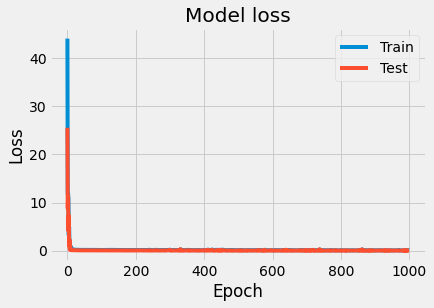

In [21]:
plt.style.use('fivethirtyeight')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

En esta grafica se muestra la precisión de la red neuronal para cada uno de los conjuntos utilizados durante el entrenamiento.

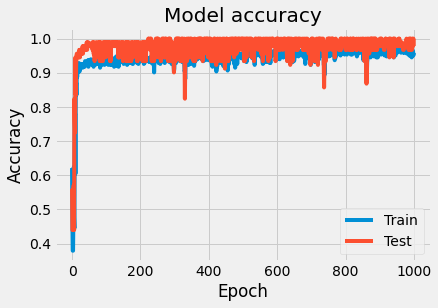

In [22]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

## Evaluación del conjunto de pruebas

In [23]:
model.evaluate(X_test1, Y_test1)[1]

4/4 [==============================] - 0s 736us/step - loss: 0.1252 - accuracy: 0.9412


0.9411764740943909

Predicción de nuevos datos

In [24]:
prediction = model.predict(X_test2)
prediction  = [1 if y>=0.5 else 0 for y in prediction] #Threshold
print(prediction)
print(Y_test2)

[0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Generacion de metricas a partir de la predicción hecha.

In [25]:
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
pred = model.predict(X_test2)
pred  = [1 if y>=0.5 else 0 for y in pred] #Threshold
print(classification_report(Y_test2 ,pred ))
print('Confusion Matrix: \n',confusion_matrix(Y_test2,pred))
print()
print('Accuracy: ', accuracy_score(Y_test2,pred))
print()

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        10
         1.0       0.67      1.00      0.80         2

    accuracy                           0.92        12
   macro avg       0.83      0.95      0.87        12
weighted avg       0.94      0.92      0.92        12

Confusion Matrix: 
 [[9 1]
 [0 2]]

Accuracy:  0.9166666666666666

